For temperature Maximum

In [163]:
from google.colab import files
uploaded = files.upload()

Saving Pr_Tmax_Tmin_SSP_1_2.6_MPI-ESM1-2-LR.csv to Pr_Tmax_Tmin_SSP_1_2.6_MPI-ESM1-2-LR (1).csv


In [165]:
from google.colab import files
uploaded = files.upload()

Saving Pr_Tmax_Tmin_SSP_1_2.6_MRI-ESM2-0.csv to Pr_Tmax_Tmin_SSP_1_2.6_MRI-ESM2-0 (1).csv


In [166]:
import pandas as pd
import numpy as np

# Load observed and predicted data files
observed_data_path = 'sorted_Obserevd_data_based_on_requriment.xls'  # Replace with your observed data file path
predicted_data_path = 'Pr_Tmax_Tmin_SSP_1_2.6_MRI-ESM2-0 (1).csv'  # Replace with your predicted data file path

# Load data
df_observed = pd.read_excel(observed_data_path)
df_predicted = pd.read_csv(predicted_data_path)

import pandas as pd
import numpy as np

# Standardizing Station Names by stripping spaces and converting to upper case
df_observed['Station Name'] = df_observed['Station Name'].str.strip().str.upper()
df_predicted['Station Name'] = df_predicted['Station Name'].str.strip().str.upper()

# Filter observed data for the period 2015-2023
df_observed_filtered = df_observed[(df_observed['Year'] >= 2015) & (df_observed['Year'] <= 2023)]

# Filter predicted data for the period 2015-2023
df_predicted_filtered = df_predicted[(df_predicted['Year'] >= 2015) & (df_predicted['Year'] <= 2023)]

# Initialize an empty DataFrame to store CRI values for each station
stations = df_observed_filtered['Station Name'].unique()
cri_results_tmax = pd.DataFrame(columns=['Model', 'Station ID', 'RMSE', 'Bias', 'Correlation', 'NSE', 'KGE', 'CRI_Tmax'])

for station in stations:
    # Filter data by station
    observed_station = df_observed_filtered[df_observed_filtered['Station Name'] == station]
    predicted_station = df_predicted_filtered[df_predicted_filtered['Station Name'] == station]

    # Ensure the data is sorted by date and aligned
    observed_station = observed_station.sort_values(by=['Year', 'Month']).reset_index(drop=True)
    predicted_station = predicted_station.sort_values(by=['Year', 'Month']).reset_index(drop=True)

    # Merge the two dataframes to ensure they are aligned by Year and Month
    merged_df = pd.merge(observed_station, predicted_station, on=['Year', 'Month'], suffixes=('_obs', '_pred'))

    # Check if there are missing data after merging
    if merged_df.isnull().values.any():
        print(f"Missing data for station {station}. Skipping this station.")
        continue

    # Extract the relevant variables for Tmax
    observed_values = merged_df['Observed_Tmax']
    predicted_values = merged_df['Predicted_Tmax']

    # Check if the observed values have zero variance (to prevent division by zero in NSE)
    if np.var(observed_values) == 0:
        print(f"Zero variance in observed data for station {station}. Skipping this station.")
        continue

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predicted_values - observed_values) ** 2))

    # Calculate Bias
    bias = np.mean(predicted_values - observed_values)

    # Calculate Correlation Coefficient
    correlation = np.corrcoef(observed_values, predicted_values)[0, 1] if len(observed_values) > 1 else np.nan

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    nse = 1 - np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - np.mean(observed_values)) ** 2) if np.var(observed_values) != 0 else np.nan

    # Calculate KGE (Kling-Gupta Efficiency)
    r = correlation
    alpha = np.std(predicted_values) / np.std(observed_values) if np.std(observed_values) != 0 else np.nan
    beta = np.mean(predicted_values) / np.mean(observed_values) if np.mean(observed_values) != 0 else np.nan
    kge = 1 - np.sqrt((r - 1) ** 2 + (alpha - 1) ** 2 + (beta - 1) ** 2) if not np.isnan(r) and not np.isnan(alpha) and not np.isnan(beta) else np.nan

    # Combine metrics into a single CRI value for Tmax (simple average here, adjust as needed)
    metrics = [rmse, bias, correlation, nse, kge]
    cri_tmax = np.nanmean(metrics)  # Use nanmean to ignore NaN values

    # Create a DataFrame with the results and concatenate it to the main results DataFrame
    result_df = pd.DataFrame({
        'Model': ['GCM_Model_1'],  # Replace with the actual model name
        'Station ID': [station],
        'RMSE': [rmse],
        'Bias': [bias],
        'Correlation': [correlation],
        'NSE': [nse],
        'KGE': [kge],
        'CRI_Tmax': [cri_tmax]
    })

    cri_results_tmax = pd.concat([cri_results_tmax, result_df], ignore_index=True)

print(cri_results_tmax)

# Set the 'Station ID' as the index of the DataFrame
cri_results_tmax.set_index('Station ID', inplace=True)

# Display the updated DataFrame
print(cri_results_tmax)

# Ensure 'Station ID' reflects the correct station names
cri_results_tmax['Station ID'] = stations

# Display the updated DataFrame
print(cri_results_tmax)

# Pivot the DataFrame to get the desired format
cri_results_pivot = cri_results_tmax.pivot(index='Model', columns='Station ID', values='CRI_Tmax')

# Display the updated DataFrame for easy copy-pasting
print(cri_results_pivot.to_csv(sep='\t'))




          Model  Station ID      RMSE      Bias  Correlation       NSE  \
0   GCM_Model_1  BAHAWALPUR  4.481288  1.864593     0.940993  0.615825   
1   GCM_Model_1  FAISALABAD  4.978101  1.615943     0.930754  0.533509   
2   GCM_Model_1   HYDERABAD  3.845726  2.985476     0.947237  0.513433   
3   GCM_Model_1   ISLAMABAD  7.690175 -5.631147     0.916458 -0.363588   
4   GCM_Model_1     KARACHI  4.208106 -3.693230     0.880777 -0.610270   
5   GCM_Model_1      LAHORE  4.532118 -1.198219     0.907148  0.565179   
6   GCM_Model_1     LARKANA  4.312711  2.892068     0.953363  0.649014   
7   GCM_Model_1      MULTAN  4.887184  2.601986     0.943932  0.551837   
8   GCM_Model_1    PESHAWAR  5.597076 -2.977579     0.943918  0.390186   
9   GCM_Model_1      QUETTA  3.743367  0.624307     0.966650  0.808503   
10  GCM_Model_1    SARGODHA  6.805023  4.034309     0.923823  0.066464   
11  GCM_Model_1     SIALKOT  6.044502  3.304295     0.914881  0.234594   

         KGE  CRI_Tmax  
0   0.599805

<ipython-input-166-a28beb8ec239>:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cri_results_tmax = pd.concat([cri_results_tmax, result_df], ignore_index=True)


FOr Temperature Minimum

In [159]:
from google.colab import files
uploaded = files.upload()

Saving Pr_Tmax_Tmin_SSP_1_2.6_IPSL-CM6A-LR.csv to Pr_Tmax_Tmin_SSP_1_2.6_IPSL-CM6A-LR (1).csv


In [160]:
import pandas as pd
import numpy as np

# Load observed and predicted data files
df_observed = pd.read_excel('sorted_Obserevd_data_based_on_requriment.xls')
df_predicted = pd.read_csv('Pr_Tmax_Tmin_SSP_1_2.6_IPSL-CM6A-LR (1).csv')

# Standardizing Station Names by stripping spaces and converting to upper case
df_observed['Station Name'] = df_observed['Station Name'].str.strip().str.upper()
df_predicted['Station Name'] = df_predicted['Station Name'].str.strip().str.upper()

# Ensure 'Year' and 'Month' columns are of the same type in both dataframes
# Handle NaN or inf values in the 'Month' and 'Year' columns before converting to int
df_observed['Year'] = pd.to_numeric(df_observed['Year'], errors='coerce').fillna(0).astype(int)
df_observed['Month'] = pd.to_numeric(df_observed['Month'], errors='coerce').fillna(0).astype(int)
df_predicted['Year'] = pd.to_numeric(df_predicted['Year'], errors='coerce').fillna(0).astype(int)
df_predicted['Month'] = pd.to_numeric(df_predicted['Month'], errors='coerce').fillna(0).astype(int)

# Filter observed data for the period 2015-2023
df_observed_filtered = df_observed[(df_observed['Year'] >= 2015) & (df_observed['Year'] <= 2023)]

# Filter predicted data for the period 2015-2023
df_predicted_filtered = df_predicted[(df_predicted['Year'] >= 2015) & (df_predicted['Year'] <= 2023)]

# Initialize an empty DataFrame to store CRI values for each station
stations = df_observed_filtered['Station Name'].unique()
cri_results_tmin = pd.DataFrame(columns=['Model', 'Station ID', 'RMSE', 'Bias', 'Correlation', 'NSE', 'KGE', 'CRI_Tmin'])

for station in stations:
    # Filter data by station
    observed_station = df_observed_filtered[df_observed_filtered['Station Name'] == station]
    predicted_station = df_predicted_filtered[df_predicted_filtered['Station Name'] == station]

    # Ensure the data is sorted by date and aligned
    observed_station = observed_station.sort_values(by=['Year', 'Month']).reset_index(drop=True)
    predicted_station = predicted_station.sort_values(by=['Year', 'Month']).reset_index(drop=True)

    # Merge the two dataframes to ensure they are aligned by Year and Month
    merged_df = pd.merge(observed_station, predicted_station, on=['Year', 'Month'], suffixes=('_obs', '_pred'))

    # Check if there are missing data after merging
    if merged_df.isnull().values.any():
        print(f"Missing data for station {station}. Skipping this station.")
        continue

    # Extract the relevant variables for Tmin
    observed_values = merged_df['Observed_Tmin']
    predicted_values = merged_df['Predicted_Tmin']

    # Check if the observed values have zero variance (to prevent division by zero in NSE)
    if np.var(observed_values) == 0:
        print(f"Zero variance in observed data for station {station}. Skipping this station.")
        continue

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predicted_values - observed_values) ** 2))

    # Calculate Bias
    bias = np.mean(predicted_values - observed_values)

    # Calculate Correlation Coefficient
    correlation = np.corrcoef(observed_values, predicted_values)[0, 1] if len(observed_values) > 1 else np.nan

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    nse = 1 - np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - np.mean(observed_values)) ** 2) if np.var(observed_values) != 0 else np.nan

    # Calculate KGE (Kling-Gupta Efficiency)
    r = correlation
    alpha = np.std(predicted_values) / np.std(observed_values) if np.std(observed_values) != 0 else np.nan
    beta = np.mean(predicted_values) / np.mean(observed_values) if np.mean(observed_values) != 0 else np.nan
    kge = 1 - np.sqrt((r - 1) ** 2 + (alpha - 1) ** 2 + (beta - 1) ** 2) if not np.isnan(r) and not np.isnan(alpha) and not np.isnan(beta) else np.nan

    # Combine metrics into a single CRI value for Tmin (simple average here, adjust as needed)
    metrics = [rmse, bias, correlation, nse, kge]
    cri_tmin = np.nanmean(metrics)  # Use nanmean to ignore NaN values

    # Create a DataFrame with the results and concatenate it to the main results DataFrame
    result_df = pd.DataFrame({
        'Model': ['GCM_Model_1'],  # Replace with the actual model name
        'Station ID': [station],
        'RMSE': [rmse],
        'Bias': [bias],
        'Correlation': [correlation],
        'NSE': [nse],
        'KGE': [kge],
        'CRI_Tmin': [cri_tmin]
    })

    cri_results_tmin = pd.concat([cri_results_tmin, result_df], ignore_index=True)

print(cri_results_tmin)

# Set the 'Station ID' as the index of the DataFrame
cri_results_tmin.set_index('Station ID', inplace=True)

# Display the updated DataFrame
print(cri_results_tmin)

# Ensure 'Station ID' reflects the correct station names
cri_results_tmin['Station ID'] = stations

# Display the updated DataFrame
print(cri_results_tmin)

# Pivot the DataFrame to get the desired format
cri_results_pivot = cri_results_tmin.pivot(index='Model', columns='Station ID', values='CRI_Tmin')

# Display the updated DataFrame for easy copy-pasting
print(cri_results_pivot.to_csv(sep='\t'))





          Model  Station ID       RMSE       Bias  Correlation       NSE  \
0   GCM_Model_1  BAHAWALPUR  12.769293  -2.834349    -0.000015 -1.554218   
1   GCM_Model_1  FAISALABAD  12.960559  -2.718867     0.000248 -1.604366   
2   GCM_Model_1   HYDERABAD   8.993375  -2.856904     0.001653 -1.351755   
3   GCM_Model_1   ISLAMABAD  12.781467  -6.018767    -0.000149 -1.905187   
4   GCM_Model_1     KARACHI   9.680601  -4.238187     0.000070 -1.738793   
5   GCM_Model_1      LAHORE  12.466532  -4.876878     0.000304 -1.977184   
6   GCM_Model_1     LARKANA  13.619669  -7.720650     0.000094 -2.161505   
7   GCM_Model_1      MULTAN  13.566864  -3.301127    -0.000049 -1.664320   
8   GCM_Model_1    PESHAWAR  14.278704  -8.729999     0.000444 -2.474372   
9   GCM_Model_1      QUETTA  12.610583  -4.034025     0.000809 -1.188789   
10  GCM_Model_1    SARGODHA  12.883384  -2.050900     0.000484 -1.544307   
11  GCM_Model_1     SIALKOT  15.780992 -11.033234    -0.000289 -3.607257   

         KG

<ipython-input-160-d92d1adb2c95>:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cri_results_tmin = pd.concat([cri_results_tmin, result_df], ignore_index=True)


In [40]:
from google.colab import files
uploaded = files.upload()

Saving Pr_Tmax_Tmin_SSP_1_2.6_CNRM-ESM2-1.csv to Pr_Tmax_Tmin_SSP_1_2.6_CNRM-ESM2-1 (1).csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving sorted_Obserevd_data_based_on_requriment.xls to sorted_Obserevd_data_based_on_requriment.xls


In [41]:
import pandas as pd
import numpy as np

# Load observed and predicted data files
df_observed = pd.read_excel('sorted_Obserevd_data_based_on_requriment.xls')
df_predicted = pd.read_csv('Pr_Tmax_Tmin_SSP_1_2.6_CNRM-ESM2-1 (1).csv')

# Standardizing Station Names by stripping spaces and converting to upper case
df_observed['Station Name'] = df_observed['Station Name'].str.strip().str.upper()
df_predicted['Station Name'] = df_predicted['Station Name'].str.strip().str.upper()

# Ensure 'Year' and 'Month' columns are of the same type in both dataframes
# Handle NaN or inf values in the 'Month' and 'Year' columns before converting to int
df_observed['Year'] = pd.to_numeric(df_observed['Year'], errors='coerce').fillna(0).astype(int)
df_observed['Month'] = pd.to_numeric(df_observed['Month'], errors='coerce').fillna(0).astype(int)
df_predicted['Year'] = pd.to_numeric(df_predicted['Year'], errors='coerce').fillna(0).astype(int)
df_predicted['Month'] = pd.to_numeric(df_predicted['Month'], errors='coerce').fillna(0).astype(int)

# Filter observed data for the period 2015-2023
df_observed_filtered = df_observed[(df_observed['Year'] >= 2015) & (df_observed['Year'] <= 2023)]

# Filter predicted data for the period 2015-2023
df_predicted_filtered = df_predicted[(df_predicted['Year'] >= 2015) & (df_predicted['Year'] <= 2023)]

# Initialize an empty DataFrame to store CRI values for each station
stations = df_observed_filtered['Station Name'].unique()
cri_results_pr = pd.DataFrame(columns=['Model', 'Station ID', 'RMSE', 'Bias', 'Correlation', 'NSE', 'KGE', 'CRI_Pr'])

for station in stations:
    # Filter data by station
    observed_station = df_observed_filtered[df_observed_filtered['Station Name'] == station]
    predicted_station = df_predicted_filtered[df_predicted_filtered['Station Name'] == station]

    # Ensure the data is sorted by date and aligned
    observed_station = observed_station.sort_values(by=['Year', 'Month']).reset_index(drop=True)
    predicted_station = predicted_station.sort_values(by=['Year', 'Month']).reset_index(drop=True)

    # Merge the two dataframes to ensure they are aligned by Year and Month
    merged_df = pd.merge(observed_station, predicted_station, on=['Year', 'Month'], suffixes=('_obs', '_pred'))

    # Check if there are missing data after merging
    if merged_df.isnull().values.any():
        print(f"Missing data for station {station}. Skipping this station.")
        continue

    # Extract the relevant variables for Precipitation (Pr)
    observed_values = merged_df['Observed_Pr']  # Replace 'Observed_Pr' with the actual column name in your data
    predicted_values = merged_df['Predicted_Pr']  # Replace 'Predicted_Pr' with the actual column name in your data

    # Check if the observed values have zero variance (to prevent division by zero in NSE)
    if np.var(observed_values) == 0:
        print(f"Zero variance in observed data for station {station}. Skipping this station.")
        continue

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predicted_values - observed_values) ** 2))

    # Calculate Bias
    bias = np.mean(predicted_values - observed_values)

    # Calculate Correlation Coefficient
    correlation = np.corrcoef(observed_values, predicted_values)[0, 1] if len(observed_values) > 1 else np.nan

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    nse = 1 - np.sum((observed_values - predicted_values) ** 2) / np.sum((observed_values - np.mean(observed_values)) ** 2) if np.var(observed_values) != 0 else np.nan

    # Calculate KGE (Kling-Gupta Efficiency)
    r = correlation
    alpha = np.std(predicted_values) / np.std(observed_values) if np.std(observed_values) != 0 else np.nan
    beta = np.mean(predicted_values) / np.mean(observed_values) if np.mean(observed_values) != 0 else np.nan
    kge = 1 - np.sqrt((r - 1) ** 2 + (alpha - 1) ** 2 + (beta - 1) ** 2) if not np.isnan(r) and not np.isnan(alpha) and not np.isnan(beta) else np.nan

    # Combine metrics into a single CRI value for Pr (simple average here, adjust as needed)
    metrics = [rmse, bias, correlation, nse, kge]
    cri_pr = np.nanmean(metrics)  # Use nanmean to ignore NaN values

    # Create a DataFrame with the results and concatenate it to the main results DataFrame
    result_df = pd.DataFrame({
        'Model': ['GCM_Model_1'],  # Replace with the actual model name
        'Station ID': [station],
        'RMSE': [rmse],
        'Bias': [bias],
        'Correlation': [correlation],
        'NSE': [nse],
        'KGE': [kge],
        'CRI_Pr': [cri_pr]
    })

    cri_results_pr = pd.concat([cri_results_pr, result_df], ignore_index=True)

print(cri_results_pr)

# Set the 'Station ID' as the index of the DataFrame
cri_results_pr.set_index('Station ID', inplace=True)

# Display the updated DataFrame
print(cri_results_pr)

# Ensure 'Station ID' reflects the correct station names
cri_results_pr['Station ID'] = stations

# Display the updated DataFrame
print(cri_results_pr)

# Pivot the DataFrame to get the desired format
cri_results_pivot = cri_results_pr.pivot(index='Model', columns='Station ID', values='CRI_Pr')

# Display the updated DataFrame for easy copy-pasting
print(cri_results_pivot.to_csv(sep='\t'))


          Model  Station ID        RMSE       Bias  Correlation        NSE  \
0   GCM_Model_1  BAHAWALPUR   45.176546   3.812717     0.000199  -0.893146   
1   GCM_Model_1  FAISALABAD   58.581181   6.990651     0.000173  -0.898577   
2   GCM_Model_1   HYDERABAD   69.749332  24.207836     0.000855  -1.488269   
3   GCM_Model_1   ISLAMABAD  203.699135 -17.723268    -0.000375  -0.202395   
4   GCM_Model_1     KARACHI   68.221005  14.004179     0.001201  -0.512575   
5   GCM_Model_1      LAHORE   39.120937  20.410715    -0.000046 -28.317897   
6   GCM_Model_1     LARKANA   87.083276  12.614439    -0.000237  -0.223183   
7   GCM_Model_1      MULTAN   47.545807   7.839580     0.000674  -1.209305   
8   GCM_Model_1    PESHAWAR   55.515948  25.118531     0.002024  -1.072018   
9   GCM_Model_1      QUETTA   41.688116  15.830817    -0.000555  -0.302142   
10  GCM_Model_1    SARGODHA   45.578860  25.305010     0.000070 -30.844648   
11  GCM_Model_1     SIALKOT  135.506397  -3.771829     0.000064 

<ipython-input-41-18005ba5455a>:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cri_results_pr = pd.concat([cri_results_pr, result_df], ignore_index=True)


In [44]:
from google.colab import files
uploaded = files.upload()

Saving Models performace.xls to Models performace (1).xls


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

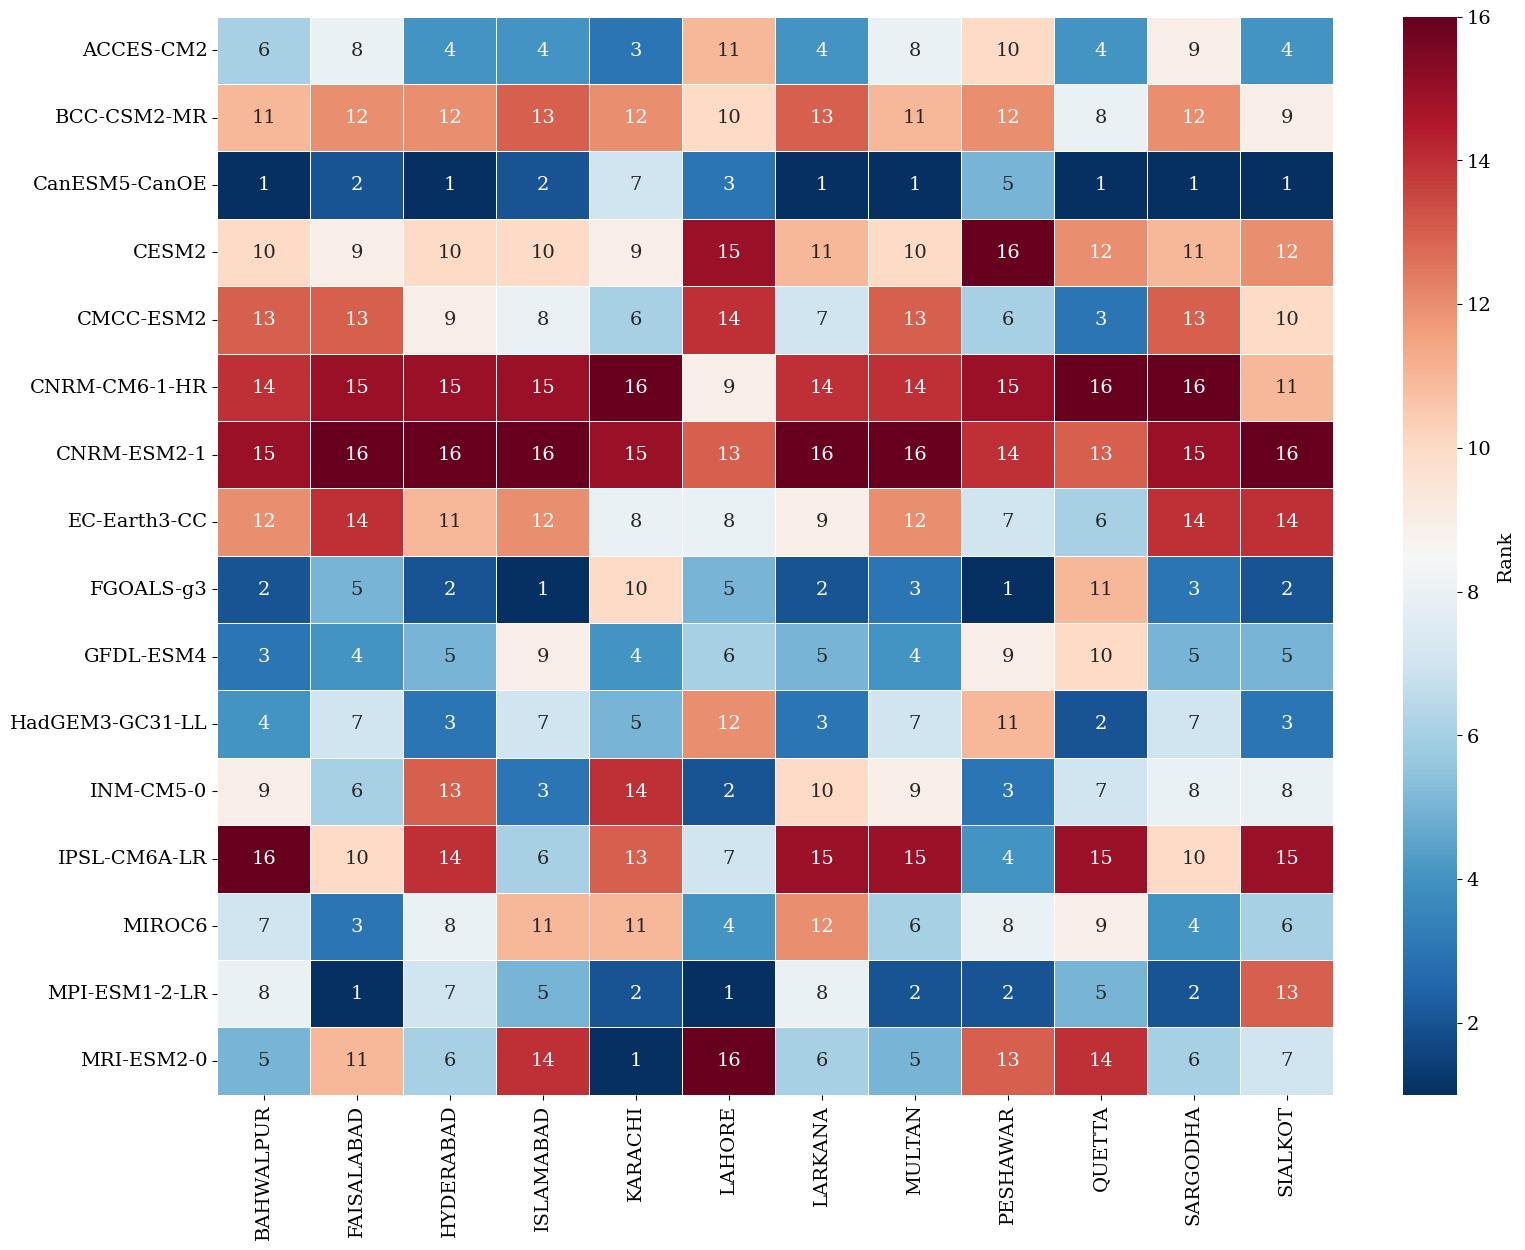

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set font globally to DejaVu Serif
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 14  # You can adjust the size as needed

# Load the Excel file into a DataFrame, specifying the sheet name
file_path = 'Models performace (1).xls'  # Replace with your actual file path
sheet_name = 'CRI_Pr'  # Replace with your actual sheet name
df_ranks = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)  # Assuming the first column is the index

# Rank the CRI values for each station, where the lowest value gets rank 1
df_ranked = df_ranks.rank(axis=0, method='min', ascending=True)

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(df_ranked, annot=True, cmap='RdBu_r', linewidths=.5, cbar_kws={'label': 'Rank'}, fmt=".0f")

# Customize the plot
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Save the figure as a high-quality JPG file
plt.savefig("station_based_ranking_heatmap.jpg", format="jpg", dpi=300)


# Save the figure as a high-quality JPG file
plt.savefig("station_based_ranking_heatmap.jpg", format="jpg", dpi=300)  # Save as high-quality JPG file

# Download the figure
files.download("station_based_ranking_heatmap.jpg")


# Display the plot
plt.show()
